In [18]:
#import all required modules
from idbmiot import IDBMIOT
import pandas as pd
import numpy as np
from resampling import resample
from chooseSample import chooseSample
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random
import math
from sklearn.cross_validation import KFold, train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  
from sklearn.metrics import roc_auc_score
import time
import matplotlib.pyplot as plt 



In [19]:
# import dataset
loc = "data/ecoli.data"
df = pd.read_csv(loc, sep=',', header=None)
columns = ['seq','Mcg','Gvh','Lip','Chg','Aac','Alm1','Alm2','Class']
df.columns = columns
S = df.drop('seq', axis=1)



In [20]:
class AttributeIndicator(object):
    def __init__(self):
        self.nominal = [8]
        self.numeric = [1,2,3,4,5,6,7]

A = AttributeIndicator()

k1 = 2
k2 = 4


In [21]:
beforeTimeInMillis = int(round(time.time() * 1000))

#Perform oversampling
newS = IDBMIOT(S,A, k1, k2)

afterTimeInMillis = int(round(time.time() * 1000))

excutionTime = afterTimeInMillis - beforeTimeInMillis

#Get distribution for sample original/after sampling
print ("Distribution of class labels before resampling {}".format(S['Class'].value_counts()))
print ("Distribution of class labels after resampling {}".format(newS['Class'].value_counts()))



Oversampling rate: cp      0
im      0
imL    22
imS    24
imU     0
om     20
omL    20
pp      0
Name: Class, dtype: int64


/home/prasad/Documents/project/project-algo/amdo/code/idbmiot.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  randomSample['principal component 1']  = randomSample['principal component 1'] + rs


Distribution of class labels before resampling cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: Class, dtype: int64
Distribution of class labels after resampling cp     143
im      77
pp      52
om      40
imU     35
imS     26
omL     25
imL     24
Name: Class, dtype: int64


In [22]:
print("BeforeTimeInMillis: (in ms): " + str(beforeTimeInMillis))
print("AfterTimeInMillis: (in ms): " + str(afterTimeInMillis))
print("Total Time spent: (in ms): " + str(excutionTime) + ", for datasize of: " + str(len(df)) )

BeforeTimeInMillis: (in ms): 1546061935288
AfterTimeInMillis: (in ms): 1546061940188
Total Time spent: (in ms): 4900, for datasize of: 336


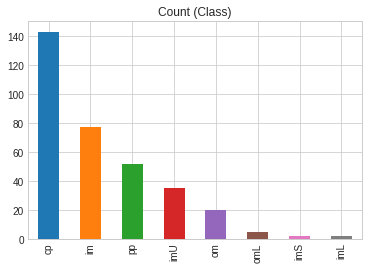

In [23]:
S.Class.value_counts().plot(kind='bar', title='Count (Class)');

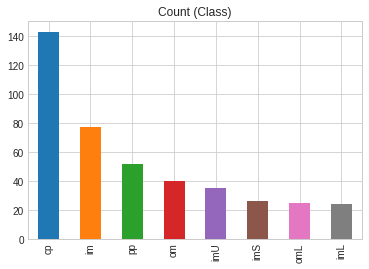

In [24]:
newS.Class.value_counts().plot(kind='bar', title='Count (Class)');

In [25]:
#difference increase
dis_new = newS.Class.value_counts()
dis_S = S.Class.value_counts()

diff = dis_new - dis_S



In [40]:
dis_new.count()




8

In [26]:
#diff
diff

cp      0
im      0
imL    22
imS    24
imU     0
om     20
omL    20
pp      0
Name: Class, dtype: int64

In [27]:
y = newS.Class

X = newS.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

y_train, y_test = np.asarray(y_train), np.asarray(y_test)

In [28]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)

clf.fit(X_train, y_train)

report = classification_report(y_test, clf.predict(X_test))

/home/prasad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
print(report)

             precision    recall  f1-score   support

         cp       0.72      1.00      0.83        43
         im       0.65      0.92      0.76        24
        imL       1.00      0.38      0.55         8
        imS       0.00      0.00      0.00         6
        imU       0.00      0.00      0.00         9
         om       1.00      0.64      0.78        11
        omL       1.00      0.80      0.89        10
         pp       0.80      0.75      0.77        16

avg / total       0.69      0.75      0.70       127



In [30]:
import matplotlib.pyplot as plt
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

[0.72, 1.0, 0.83]
[0.65, 0.92, 0.76]
[1.0, 0.38, 0.55]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[1.0, 0.64, 0.78]
[1.0, 0.8, 0.89]
[0.8, 0.75, 0.77]


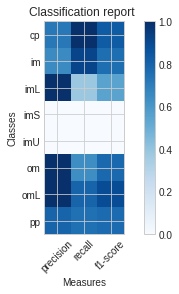

In [31]:
plot_classification_report(report)

In [32]:
score=accuracy_score(y_test, clf.predict(X_test))

In [33]:
score

0.7480314960629921

In [44]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
Y_test = y_test
y_score = y_score = clf.decision_function(X_test)
for i in range(dis_new.count()):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'